In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

import nltk
from nltk.stem.snowball import EnglishStemmer
from gensim.models import word2vec
from sklearn.manifold import TSNE


In [2]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words()

[nltk_data] Downloading package stopwords to
[nltk_data]     D:\Users\heatherrb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# load csv
cord19_df = pd.read_csv("cord19_df_2nd_ed.csv")

# select the covid-19 related rows only
cord19_df = cord19_df.loc[cord19_df.is_covid19]

D:\Users\heatherrb\.conda\envs\daccathon\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
cord19_df.columns

Index(['paper_id', 'body_text', 'methods', 'results', 'source', 'title', 'doi',
       'abstract', 'publish_time', 'authors', 'journal', 'arxiv_id', 'url',
       'publish_year', 'is_covid19', 'study_design'],
      dtype='object')

In [5]:
cord19_df.shape

(6476, 16)

In [6]:
# Tokenise the body text for each article
def tokenize(string):

    # strip any characters which are not a space or a word character, including underscore, and cast to lower case
    clean_body = re.sub(r'([^\s\w]|_)+', '', string).lower()
    tokens = clean_body.split(' ')

    stemmer = EnglishStemmer(ignore_stopwords=True)

    clean_tokens = [stemmer.stem(word) for word in tokens if word not in stopwords]

    return clean_tokens


# This times out for me at the moment
#cord19_df['tokens'] = cord19_df.body_text.apply(tokenize)

In [7]:
tokens = cord19_df.iloc[:500].body_text.apply(tokenize)

In [8]:
# List all tokenised texts as a corpus
corpus = list(tokens)

# Train a word2vec model for the words that appear at least 50 times
model = word2vec.Word2Vec(corpus, min_count=100, size=50, window=5)

D:\Users\heatherrb\.conda\envs\daccathon\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
D:\Users\heatherrb\.conda\envs\daccathon\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\heatherrb\.conda\envs\daccathon\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


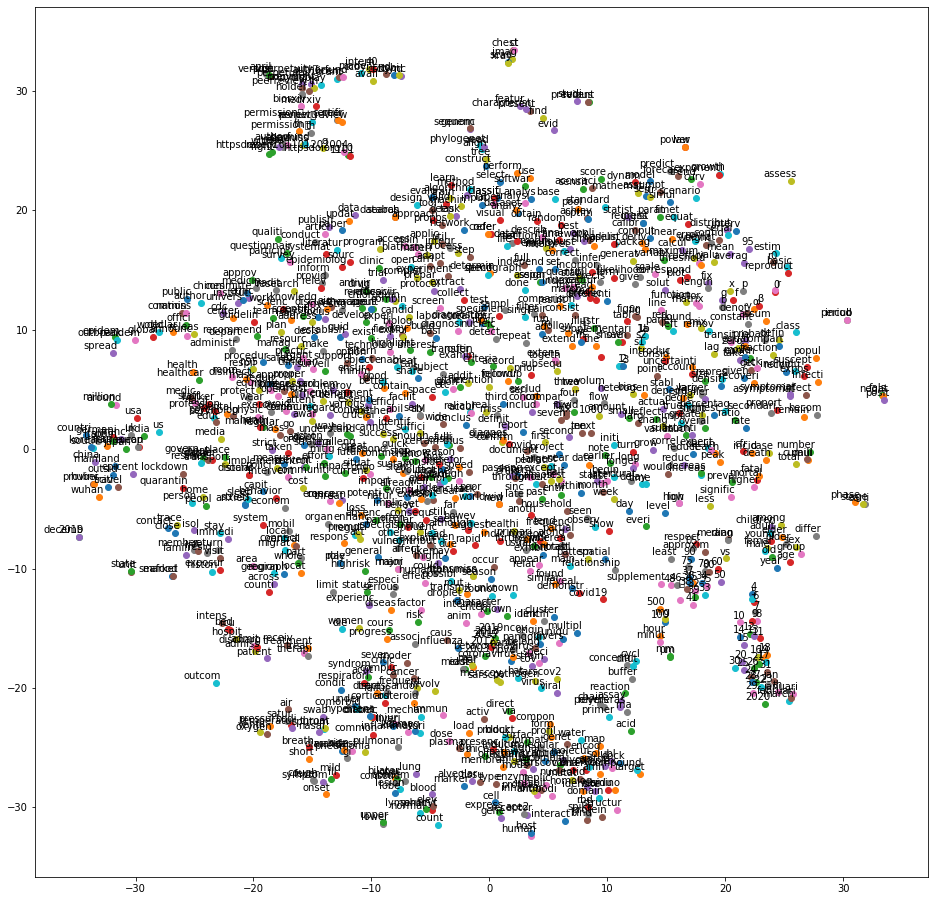

In [9]:
# Define a function to plot tsne model
def tsne_plot(model):
    "Creates and TSNE model and plots it"

    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


tsne_plot(model)

In [10]:
model.most_similar('treat')

D:\Users\heatherrb\.conda\envs\daccathon\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('treatment', 0.8961504101753235),
 ('therapi', 0.8856313228607178),
 ('receiv', 0.8089380860328674),
 ('corticosteroid', 0.788385272026062),
 ('agent', 0.7838022708892822),
 ('remdesivir', 0.7579567432403564),
 ('efficaci', 0.7396285533905029),
 ('antivir', 0.7269359230995178),
 ('andor', 0.7185037732124329),
 ('chloroquin', 0.7150344252586365)]

In [11]:
model.most_similar(positive=['treat'], negative=['symptom'])

D:\Users\heatherrb\.conda\envs\daccathon\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('antivir', 0.6986534595489502),
 ('drug', 0.6392999887466431),
 ('efficaci', 0.6237640380859375),
 ('chloroquin', 0.6227738857269287),
 ('remdesivir', 0.6016466617584229),
 ('vaccin', 0.5773910284042358),
 ('inhibitor', 0.5719497799873352),
 ('therapeut', 0.5527954697608948),
 ('treatment', 0.5454213619232178),
 ('agent', 0.5402755737304688)]

In [12]:
model.wv.vocab

{'coronavirus': <gensim.models.keyedvectors.Vocab at 0x2063fe84dc8>,
 'diseas': <gensim.models.keyedvectors.Vocab at 0x2073d84fc88>,
 '2019': <gensim.models.keyedvectors.Vocab at 0x2062263d4c8>,
 'covid19': <gensim.models.keyedvectors.Vocab at 0x2062263d888>,
 'spread': <gensim.models.keyedvectors.Vocab at 0x206225a1988>,
 'speed': <gensim.models.keyedvectors.Vocab at 0x206225a1688>,
 'scale': <gensim.models.keyedvectors.Vocab at 0x206225a1dc8>,
 'sinc': <gensim.models.keyedvectors.Vocab at 0x206225a1708>,
 'first': <gensim.models.keyedvectors.Vocab at 0x2073d8487c8>,
 'zoonot': <gensim.models.keyedvectors.Vocab at 0x206225a1848>,
 'event': <gensim.models.keyedvectors.Vocab at 0x206225a1cc8>,
 'introduc': <gensim.models.keyedvectors.Vocab at 0x206225a1bc8>,
 'acut': <gensim.models.keyedvectors.Vocab at 0x206225a1748>,
 'respiratori': <gensim.models.keyedvectors.Vocab at 0x206225a1648>,
 'syndrom': <gensim.models.keyedvectors.Vocab at 0x206225a10c8>,
 '2': <gensim.models.keyedvectors.Vo